# World Happiness Report

What makes someone happy? 

This [Kaggle dataset](https://www.kaggle.com/unsdsn/world-happiness) collected The World Happiness Report, ranking 155 countries by their happiness levels.

In [1]:
#Import relevant libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Change the jupyter displays
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [3]:
#Load the Kaggle goodreads dataset obtained from
#https://www.kaggle.com/unsdsn/world-happiness
happy2015 = pd.read_csv('2015.csv')
happy2016 = pd.read_csv('2016.csv')
happy2017 = pd.read_csv('2017.csv')
happy2018 = pd.read_csv('2018.csv')
happy2019 = pd.read_csv('2019.csv')

In [4]:
happy2015.head(2)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201


In [5]:
#Correct country name
happy2015.loc[happy2015.Country=='North Cyprus', 'Country'] = 'Northern Cyprus'

In [6]:
happy2016.head(2)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463


In [7]:
#Correct country name
happy2016.loc[happy2016.Country=='North Cyprus', 'Country'] = 'Northern Cyprus'

In [8]:
happy2017.head(2)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707


In [9]:
#Rename locations to be consistent with other years
happy2017.loc[happy2017.Country == 'Taiwan Province of China', 'Country'] = 'Taiwan'
happy2017.loc[happy2017.Country == 'Hong Kong S.A.R., China', 'Country'] = 'Hong Kong'
happy2017.loc[happy2017.Country=='North Cyprus', 'Country'] = 'Northern Cyprus'

In [10]:
happy2018.head(2)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340


In [11]:
happy2019.head(2)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410


To combine all of them into one dataframe for easier analysis:

In [12]:
#Create regions dictionary to apply to the rest of the years'
regions = {}

for country in happy2016['Country'].unique():
    regions[country] = happy2016[happy2016['Country']==country]['Region'].tolist()

#Add in countries not in 2016 to the dictionary
regions['Central African Republic'] = 'Sub-Saharan Africa'
regions['Mozambique'] = 'Sub-Saharan Africa'
regions['Lesotho'] = 'Sub-Saharan Africa'
regions['Swaziland'] = 'Sub-Saharan Africa'
regions['Trinidad & Tobago'] = 'Latin America and Caribbean'
regions['Djibuoti'] = 'Sub-Saharan Africa'
regions['North Macedonia'] = 'Central and Eastern Europe'
regions['Somaliland region'] = 'Sub-Saharan Africa'
regions['Oman'] = 'Sub-Saharan Africa'
regions['Djibouti'] = 'Sub-Saharan Africa'
regions['Gambia'] = 'Sub-Saharan Africa'

In [13]:
def reformat(df_year, year):
    """Prepare each dataframe into a consistent format to make it easier to combine them all."""
    
    #Rename all columns
    for col in df_year.columns:
        if 'rank' in col.lower():
            df_year.rename(columns={col:'Rank'}, inplace=True)
        elif 'country' in col.lower():
            df_year.rename(columns={col:'Country'}, inplace=True)
        elif 'score' in col.lower():
            df_year.rename(columns={col:'Score'}, inplace=True)
        elif 'health' in col.lower():
            df_year.rename(columns={col:'LifeExp'}, inplace=True)
        elif 'gdp' in col.lower():
            df_year.rename(columns={col:'GDPperCapita'}, inplace=True)
        elif col.lower() in ['social support','family']:
            df_year.rename(columns={col:'Social'}, inplace=True)
        elif 'freedom' in col.lower():
            df_year.rename(columns={col:'Freedom'}, inplace=True)
        elif 'corruption' in col.lower():
            df_year.rename(columns={col:'Corruption'}, inplace=True)
    
    #Add region column
    df_year['Region'] = df_year['Country'].replace(regions)
    
    #Add year column
    df_year['Year'] = year
    #df_year.set_index(['Region', 'Year'])
    
    return df_year

In [14]:
#Make list of columns to keep
cols = ['Country', 'Region', 'Rank', 'Score', 'LifeExp', 'GDPperCapita', 'Social', 'Freedom', 'Generosity', 'Corruption', 'Year']

#Reformat all dataframes and combine them
df = reformat(happy2015, 2015)[cols]
df = df.append(reformat(happy2016, 2016), sort=False)
df = df.append(reformat(happy2017, 2017), sort=False)
df = df.append(reformat(happy2018, 2018), sort=False)
df = df.append(reformat(happy2019, 2019), sort=False)

#Keep only the desired columns
#df = df[cols].set_index(['Country', 'Year'])

In [15]:
df.head(10)

,Country,Region,Rank,Score,LifeExp,GDPperCapita,Social,Freedom,Generosity,Corruption,Year,Lower Confidence Interval,Upper Confidence Interval,Dystopia Residual,Whisker.high,Whisker.low,Dystopia.Residual
0,Switzerland,Western Europe,1,7.587,0.94143,1.39651,1.34951,0.66557,0.29678,0.41978,2015,NaN,NaN,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2,7.561,0.94784,1.30232,1.40223,0.62877,0.43630,0.14145,2015,NaN,NaN,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3,7.527,0.87464,1.32548,1.36058,0.64938,0.34139,0.48357,2015,NaN,NaN,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4,7.522,0.88521,1.45900,1.33095,0.66973,0.34699,0.36503,2015,NaN,NaN,NaN,NaN,NaN,NaN
4,Canada,North America,5,7.427,0.90563,1.32629,1.32261,0.63297,0.45811,0.32957,2015,NaN,NaN,NaN,NaN,NaN,NaN
5,Finland,Western Europe,6,7.406,0.88911,1.29025,1.31826,0.64169,0.23351,0.41372,2015,NaN,NaN,NaN,NaN,NaN,NaN
6,Netherlands,Western Europe,7,7.378,0.89284,1.32944,1.28017,0.61576,0.47610,0.31814,2015,NaN,NaN,NaN,NaN,NaN,NaN
7,Sweden,Western Europe,8,7.364,0.91087,1.33171,1.28907,0.65980,0.36262,0.43844,2015,NaN,NaN,NaN,NaN,NaN,NaN
8,New Zealand,Australia and New Zealand,9,7.286,0.90837,1.25018,1.31967,0.63938,0.47501,0.42922,2015,NaN,NaN,NaN,NaN,NaN,NaN
9,Australia,Australia and New Zealand,10,7.284,0.93156,1.33358,1.30923,0.65124,0.43562,0.35637,2015,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df.Region.value_counts(dropna=False)

Sub-Saharan Africa                 197
Central and Eastern Europe         145
Latin America and Caribbean        111
Western Europe                     105
Middle East and Northern Africa     95
Southeastern Asia                   44
Southern Asia                       35
Eastern Asia                        30
North America                       10
Australia and New Zealand           10
Name: Region, dtype: int64

## Who were the top 5 happiest countries from 2015-2019?

The top 5 happiest countries are quite consistent over the years: Denmark, Norway, Finland, Iceland, Switzerland. In 2015, Canada came in 5th, replacing Finland; and in 2019, the Netherlands booted Switzerland off the top 5 list. Most of these countries are in the Scandinavian Peninsula; apparently, they're doing something right over there.

In [17]:
df[df.Rank <= 5]

,Country,Region,Rank,Score,LifeExp,GDPperCapita,Social,Freedom,Generosity,Corruption,Year,Lower Confidence Interval,Upper Confidence Interval,Dystopia Residual,Whisker.high,Whisker.low,Dystopia.Residual
0,Switzerland,Western Europe,1,7.587,0.941430,1.396510,1.349510,0.665570,0.296780,0.419780,2015,NaN,NaN,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2,7.561,0.947840,1.302320,1.402230,0.628770,0.436300,0.141450,2015,NaN,NaN,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3,7.527,0.874640,1.325480,1.360580,0.649380,0.341390,0.483570,2015,NaN,NaN,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4,7.522,0.885210,1.459000,1.330950,0.669730,0.346990,0.365030,2015,NaN,NaN,NaN,NaN,NaN,NaN
4,Canada,North America,5,7.427,0.905630,1.326290,1.322610,0.632970,0.458110,0.329570,2015,NaN,NaN,NaN,NaN,NaN,NaN
0,Denmark,Western Europe,1,7.526,0.795040,1.441780,1.163740,0.579410,0.361710,0.444530,2016,7.460,7.592,2.73939,NaN,NaN,NaN
1,Switzerland,Western Europe,2,7.509,0.863030,1.527330,1.145240,0.585570,0.280830,0.412030,2016,7.428,7.590,2.69463,NaN,NaN,NaN
2,Iceland,Western Europe,3,7.501,0.867330,1.426660,1.183260,0.566240,0.476780,0.149750,2016,7.333,7.669,2.83137,NaN,NaN,NaN
3,Norway,Western Europe,4,7.498,0.795790,1.577440,1.126900,0.596090,0.378950,0.357760,2016,7.421,7.575,2.66465,NaN,NaN,NaN
4,Finland,Western Europe,5,7.413,0.810910,1.405980,1.134640,0.571040,0.254920,0.410040,2016,7.351,7.475,2.82596,NaN,NaN,NaN


In [18]:
df.describe()

,Rank,Score,LifeExp,GDPperCapita,Social,Freedom,Generosity,Corruption,Year,Lower Confidence Interval,Upper Confidence Interval,Dystopia Residual,Whisker.high,Whisker.low,Dystopia.Residual
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,781.000000,782.000000,157.000000,157.000000,157.000000,155.000000,155.000000,155.000000
mean,78.698210,5.379018,0.612416,0.916047,1.078392,0.411091,0.218576,0.125436,2016.993606,5.282395,5.481975,2.325807,5.452326,5.255713,1.850238
std,45.182384,1.127456,0.248309,0.407340,0.329548,0.152880,0.122321,0.105816,1.417364,1.148043,1.136493,0.542220,1.118542,1.145030,0.500028
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,2.732000,3.078000,0.817890,2.864884,2.521116,0.377914
25%,40.000000,4.509750,0.440183,0.606500,0.869363,0.309768,0.130000,0.054000,2016.000000,4.327000,4.465000,2.031710,4.608172,4.374955,1.591291
50%,79.000000,5.322000,0.647310,0.982205,1.124735,0.431000,0.201982,0.091000,2017.000000,5.237000,5.419000,2.290740,5.370032,5.193152,1.832910
75%,118.000000,6.189500,0.808000,1.236187,1.327250,0.531000,0.278832,0.156030,2018.000000,6.154000,6.434000,2.664650,6.194600,6.006527,2.144654
max,158.000000,7.769000,1.141000,2.096000,1.644000,0.724000,0.838075,0.551910,2019.000000,7.460000,7.669000,3.837720,7.622030,7.479556,3.117485


In [19]:
swiss = df[df.Country=='Switzerland']

In [20]:
swiss

,Country,Region,Rank,Score,LifeExp,GDPperCapita,Social,Freedom,Generosity,Corruption,Year,Lower Confidence Interval,Upper Confidence Interval,Dystopia Residual,Whisker.high,Whisker.low,Dystopia.Residual
0,Switzerland,Western Europe,1,7.587,0.941430,1.39651,1.349510,0.665570,0.296780,0.419780,2015,NaN,NaN,NaN,NaN,NaN,NaN
1,Switzerland,Western Europe,2,7.509,0.863030,1.52733,1.145240,0.585570,0.280830,0.412030,2016,7.428,7.59,2.69463,NaN,NaN,NaN
3,Switzerland,Western Europe,4,7.494,0.858131,1.56498,1.516912,0.620071,0.290549,0.367007,2017,NaN,NaN,NaN,7.561772,7.426227,2.276716
4,Switzerland,Western Europe,5,7.487,0.927000,1.42000,1.549000,0.660000,0.256000,0.357000,2018,NaN,NaN,NaN,NaN,NaN,NaN
5,Switzerland,Western Europe,6,7.480,1.052000,1.45200,1.526000,0.572000,0.263000,0.343000,2019,NaN,NaN,NaN,NaN,NaN,NaN


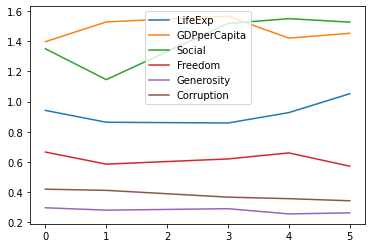

In [21]:
swiss[['LifeExp','GDPperCapita','Social','Freedom','Generosity','Corruption']].plot()
plt.show()

# Visualizations <a name='viz'></a>

In [22]:
import geopandas as gpd

In [23]:
country_shp = 'shapefile/ne_110m_admin_0_countries.shp'
tiny_shp = 'shapefile/ne_110m_admin_0_tiny_countries.shp'
populated_shp = 'shapefile/ne_110m_populated_places.shp'

In [24]:
country_gdf = gpd.read_file(country_shp)
country_gdf.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,GEOU_DIF,GEOUNIT,GU_A3,SU_DIF,SUBUNIT,SU_A3,BRK_DIFF,NAME,NAME_LONG,BRK_A3,BRK_NAME,BRK_GROUP,ABBREV,POSTAL,FORMAL_EN,FORMAL_FR,NAME_CIAWF,NOTE_ADM0,NOTE_BRK,NAME_SORT,NAME_ALT,MAPCOLOR7,MAPCOLOR8,MAPCOLOR9,MAPCOLOR13,POP_EST,POP_RANK,POP_YEAR,GDP_MD,GDP_YEAR,ECONOMY,INCOME_GRP,FIPS_10,ISO_A2,ISO_A2_EH,ISO_A3,ISO_A3_EH,ISO_N3,ISO_N3_EH,UN_A3,WB_A2,WB_A3,WOE_ID,WOE_ID_EH,WOE_NOTE,ADM0_A3_IS,ADM0_A3_US,ADM0_A3_FR,ADM0_A3_RU,ADM0_A3_ES,ADM0_A3_CN,ADM0_A3_TW,ADM0_A3_IN,ADM0_A3_NP,ADM0_A3_PK,ADM0_A3_DE,ADM0_A3_GB,ADM0_A3_BR,ADM0_A3_IL,ADM0_A3_PS,ADM0_A3_SA,ADM0_A3_EG,ADM0_A3_MA,ADM0_A3_PT,ADM0_A3_AR,ADM0_A3_JP,ADM0_A3_KO,ADM0_A3_VN,ADM0_A3_TR,ADM0_A3_ID,ADM0_A3_PL,ADM0_A3_GR,ADM0_A3_IT,ADM0_A3_NL,ADM0_A3_SE,ADM0_A3_BD,ADM0_A3_UA,ADM0_A3_UN,ADM0_A3_WB,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_LEN,LONG_LEN,ABBREV_LEN,TINY,HOMEPART,MIN_ZOOM,MIN_LABEL,MAX_LABEL,NE_ID,WIKIDATAID,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FA,NAME_FR,NAME_EL,NAME_HE,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_UK,NAME_UR,NAME_VI,NAME_ZH,NAME_ZHT,FCLASS_ISO,FCLASS_US,FCLASS_FR,FCLASS_RU,FCLASS_ES,FCLASS_CN,FCLASS_TW,FCLASS_IN,FCLASS_NP,FCLASS_PK,FCLASS_DE,FCLASS_GB,FCLASS_BR,FCLASS_IL,FCLASS_PS,FCLASS_SA,FCLASS_EG,FCLASS_MA,FCLASS_PT,FCLASS_AR,FCLASS_JP,FCLASS_KO,FCLASS_VN,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,Fiji,FJI,0,Fiji,FJI,0,Fiji,FJI,0,Fiji,Fiji,FJI,Fiji,None,Fiji,FJ,Republic of Fiji,None,Fiji,None,None,Fiji,None,5,1,2,2,889953.0,11,2019,5496,2019,6. Developing region,4. Lower middle income,FJ,FJ,FJ,FJI,FJI,242,242,242,FJ,FJI,23424813,23424813,Exact WOE match as country,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,-99,-99,Oceania,Oceania,Melanesia,East Asia & Pacific,4,4,4,-99,1,0.0,3.0,8.0,1159320625,Q712,فيجي,ফিজি,Fidschi,Fiji,Fiyi,فیجی,Fidji,Φίτζι,פיג'י,फ़िजी,Fidzsi-szigetek,Fiji,Figi,フィジー,피지,Fiji,Fidżi,Fiji,Фиджи,Fiji,Fiji,Фіджі,فجی,Fiji,斐济,斐濟,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,United Republic of Tanzania,TZA,0,Tanzania,TZA,0,Tanzania,TZA,0,Tanzania,Tanzania,TZA,Tanzania,None,Tanz.,TZ,United Republic of Tanzania,None,Tanzania,None,None,Tanzania,None,3,6,2,2,58005463.0,16,2019,63177,2019,7. Least developed region,5. Low income,TZ,TZ,TZ,TZA,TZA,834,834,834,TZ,TZA,23424973,23424973,Exact WOE match as country,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,-99,-99,Africa,Africa,Eastern Africa,Sub-Saharan Africa,8,8,5,-99,1,0.0,3.0,8.0,1159321337,Q924,تنزانيا,তানজানিয়া,Tansania,Tanzania,Tanzania,تانزانیا,Tanzanie,Τανζανία,טנזניה,तंज़ानिया,Tanzánia,Tanzania,Tanzania,タンザニア,탄자니아,Tanzania,Tanzania,Tanzânia,Танзания,Tanzania,Tanzanya,Танзанія,تنزانیہ,Tanzania,坦桑尼亚,坦尚尼亞,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,Western Sahara,SAH,0,Western Sahara,SAH,0,Western Sahara,SAH,1,W. Sahara,Western Sahara,B28,W. Sahara,None,W. Sah.,WS,Sahrawi Arab Democratic Republic,None,Western Sahara,Self admin.,Self admin.; Claimed by Morocco,Western Sahara,None,4,7,4,4,603253.0,11,2017,907,2007,7. Least developed region,5. Low income,WI,EH,EH,ESH,ESH,732,732,732,-99,-99,23424990,23424990,Exact WOE match as country,MAR,SAH,MAR,SAH,SAH,SAH,SAH,SAH,SAH,SAH,SAH,SAH,SAH,SAH,MAR,MAR,SAH,MAR,SAH

In [25]:
country_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 177 entries, 0 to 176
Columns: 162 entries, featurecla to geometry
dtypes: float64(4), geometry(1), int64(25), object(132)
memory usage: 224.1+ KB


In [26]:
tiny_gdf = gpd.read_file(tiny_shp)
tiny_gdf.head()

,scalerank,featurecla,sr_label_i,sr_label_o,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,GEOU_DIF,GEOUNIT,GU_A3,SU_DIF,SUBUNIT,SU_A3,BRK_DIFF,NAME,NAME_LONG,BRK_A3,BRK_NAME,BRK_GROUP,ABBREV,POSTAL,FORMAL_EN,FORMAL_FR,NAME_CIAWF,NOTE_ADM0,NOTE_BRK,NAME_SORT,NAME_ALT,MAPCOLOR7,MAPCOLOR8,MAPCOLOR9,MAPCOLOR13,POP_EST,POP_RANK,POP_YEAR,GDP_MD,GDP_YEAR,ECONOMY,INCOME_GRP,FIPS_10,ISO_A2,ISO_A2_EH,ISO_A3,ISO_A3_EH,ISO_N3,ISO_N3_EH,UN_A3,WB_A2,WB_A3,WOE_ID,WOE_ID_EH,WOE_NOTE,ADM0_A3_IS,ADM0_A3_US,ADM0_A3_FR,ADM0_A3_RU,ADM0_A3_ES,ADM0_A3_CN,ADM0_A3_TW,ADM0_A3_IN,ADM0_A3_NP,ADM0_A3_PK,ADM0_A3_DE,ADM0_A3_GB,ADM0_A3_BR,ADM0_A3_IL,ADM0_A3_PS,ADM0_A3_SA,ADM0_A3_EG,ADM0_A3_MA,ADM0_A3_PT,ADM0_A3_AR,ADM0_A3_JP,ADM0_A3_KO,ADM0_A3_VN,ADM0_A3_TR,ADM0_A3_ID,ADM0_A3_PL,ADM0_A3_GR,ADM0_A3_IT,ADM0_A3_NL,ADM0_A3_SE,ADM0_A3_BD,ADM0_A3_UA,ADM0_A3_UN,ADM0_A3_WB,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_LEN,LONG_LEN,ABBREV_LEN,TINY,HOMEPART,MIN_ZOOM,MIN_LABEL,MAX_LABEL,NE_ID,WIKIDATAID,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FA,NAME_FR,NAME_EL,NAME_HE,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_UK,NAME_UR,NAME_VI,NAME_ZH,NAME_ZHT,FCLASS_ISO,FCLASS_US,FCLASS_FR,FCLASS_RU,FCLASS_ES,FCLASS_CN,FCLASS_TW,FCLASS_IN,FCLASS_NP,FCLASS_PK,FCLASS_DE,FCLASS_GB,FCLASS_BR,FCLASS_IL,FCLASS_PS,FCLASS_SA,FCLASS_EG,FCLASS_MA,FCLASS_PT,FCLASS_AR,FCLASS_JP,FCLASS_KO,FCLASS_VN,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,1,Admin-0 Tiny Countries,2,4,4,Vanuatu,VUT,0,2,Sovereign country,Vanuatu,VUT,0,Vanuatu,VUT,0,Vanuatu,VUT,0,Vanuatu,Vanuatu,VUT,Vanuatu,None,Van.,VU,Republic of Vanuatu,None,Vanuatu,None,None,Vanuatu,None,6,3,7,3,299882,10,2019,934,2019,7. Least developed region,4. Lower middle income,NH,VU,VU,VUT,VUT,548,548,548,VU,VUT,23424907,23424907,Exact WOE match as country,VUT,VUT,VUT,VUT,VUT,VUT,VUT,VUT,VUT,VUT,VUT,VUT,VUT,VUT,VUT,VUT,VUT,VUT,VUT,VUT,VUT,VUT,VUT,VUT,VUT,VUT,VUT,VUT,VUT,VUT,VUT,VUT,-99,-99,Oceania,Oceania,Melanesia,East Asia & Pacific,7,7,4,2,1,0,4.0,9.0,1159321421,Q686,فانواتو,ভানুয়াতু,Vanuatu,Vanuatu,Vanuatu,وانواتو,Vanuatu,Βανουάτου,ונואטו,वानूआटू,Vanuatu,Vanuatu,Vanuatu,バヌアツ,바누아투,Vanuatu,Vanuatu,Vanuatu,Вануату,Vanuatu,Vanuatu,Вануату,وانواتو,Vanuatu,瓦努阿图,萬那杜,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,POINT (166.92707 -15.36796)
1,1,Admin-0 Tiny Countries,2,6,6,France,FR1,1,2,Dependency,French Southern and Antarctic Lands,ATF,0,French Southern and Antarctic Lands,ATF,0,French Southern and Antarctic Lands,ATF,0,Fr. S. Antarctic Lands,French Southern and Antarctic Lands,ATF,Fr. S. and Antarctic Lands,None,Fr. S.A.L.,TF,Territory of the French Southern and Antarctic...,None,None,Fr.,None,French Southern and Antarctic Lands,None,7,5,9,11,140,1,2017,16,2016,6. Developing region,2. High income: nonOECD,FS,TF,TF,ATF,ATF,260,260,260,-99,-99,28289406,28289406,Exact WOE match as country,ATF,ATF,ATF,ATF,ATF,ATF,ATF,ATF,ATF,ATF,ATF,ATF,ATF,ATF,ATF,ATF,ATF,ATF,ATF,ATF,ATF,ATF,ATF,ATF,ATF,ATF,ATF,ATF,ATF,ATF,ATF,ATF,-99,-99,Seven seas (open ocean),Africa,Seven seas (open ocean),Sub-Saharan Africa,22,35,10,2,-99,0,4.0,9.0,1159320631,Q129003,أراض فرنسية جنوبية وأنتارتيكية,ফ্র. এস. অ্যান্ড অ্যান্টার্কটিক ল্যান্ড,Französische Süd- und Antarktisgebiete,French Southern and Antarctic Lands,Tierras Australes y Antárticas Francesas,سرزمینهای جنوبی و جنوبگانی فرانسه,Terres australes et antarctiques françaises,Γαλλικά Νότια και Ανταρκτικά Εδάφη,הארצות הדרומיות והאנטארקטיות של צרפת,दक्षिण फ्रांसीसी और अंटार्कटिक लैंड,Francia déli és antarktiszi területek,Daratan Selatan dan Antarktika Perancis,Terre australi e antartiche francesi,フランス領南方・南極地域,프랑스령 남방 및 남극,Franse Zuidelijke Gebieden,Francuskie Terytoria Południowe i Antarktyczne,Terras Austrais e Antárticas Francesas,Французские Южные и Антарктические территории,Franska sydt

In [27]:
tiny_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 37 entries, 0 to 36
Columns: 164 entries, scalerank to geometry
dtypes: float64(2), geometry(1), int64(29), object(132)
memory usage: 47.5+ KB


In [28]:
tiny_gdf.NAME_LONG.unique()

array(['Vanuatu', 'French Southern and Antarctic Lands',
       'Turks and Caicos Islands', 'Cook Islands', 'Samoa', 'Tonga',
       'French Polynesia', 'Pitcairn Islands', 'Barbados',
       'Trinidad and Tobago', 'São Tomé and Principe', 'Ascension',
       'Saint Helena', 'Malta', 'Bahrain', 'Maldives',
       'British Indian Ocean Territory', 'Singapore', 'Brunei Darussalam',
       'Palau', 'Northern Mariana Islands', 'Guam',
       'Federated States of Micronesia', 'Marshall Islands', 'Kiribati',
       'Nauru', 'Tuvalu', 'Mauritius', 'Comoros', 'Faeroe Islands',
       'Jan Mayen Island', 'Saint Pierre and Miquelon', 'Bermuda',
       'Azores', 'Canary Islands', 'Madeira',
       'South Georgia and the Islands'], dtype=object)

In [29]:
populated_gdf = gpd.read_file(populated_shp)
populated_gdf.head()

,SCALERANK,NATSCALE,LABELRANK,FEATURECLA,NAME,NAMEPAR,NAMEALT,NAMEASCII,ADM0CAP,CAPIN,WORLDCITY,MEGACITY,SOV0NAME,SOV_A3,ADM0NAME,ADM0_A3,ADM1NAME,ISO_A2,NOTE,LATITUDE,LONGITUDE,POP_MAX,POP_MIN,POP_OTHER,RANK_MAX,RANK_MIN,MEGANAME,LS_NAME,MAX_POP10,MAX_POP20,MAX_POP50,MAX_POP300,MAX_POP310,MAX_NATSCA,MIN_AREAKM,MAX_AREAKM,MIN_AREAMI,MAX_AREAMI,MIN_PERKM,MAX_PERKM,MIN_PERMI,MAX_PERMI,MIN_BBXMIN,MAX_BBXMIN,MIN_BBXMAX,MAX_BBXMAX,MIN_BBYMIN,MAX_BBYMIN,MIN_BBYMAX,MAX_BBYMAX,MEAN_BBXC,MEAN_BBYC,TIMEZONE,UN_FID,POP1950,POP1955,POP1960,POP1965,POP1970,POP1975,POP1980,POP1985,POP1990,POP1995,POP2000,POP2005,POP2010,POP2015,POP2020,POP2025,POP2050,MIN_ZOOM,WIKIDATAID,WOF_ID,CAPALT,NAME_EN,NAME_DE,NAME_ES,NAME_FR,NAME_PT,NAME_RU,NAME_ZH,LABEL,NAME_AR,NAME_BN,NAME_EL,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_SV,NAME_TR,NAME_VI,NE_ID,NAME_FA,NAME_HE,NAME_UK,NAME_UR,NAME_ZHT,GEONAMESID,FCLASS_ISO,FCLASS_US,FCLASS_FR,FCLASS_RU,FCLASS_ES,FCLASS_CN,FCLASS_TW,FCLASS_IN,FCLASS_NP,FCLASS_PK,FCLASS_DE,FCLASS_GB,FCLASS_BR,FCLASS_IL,FCLASS_PS,FCLASS_SA,FCLASS_EG,FCLASS_MA,FCLASS_PT,FCLASS_AR,FCLASS_JP,FCLASS_KO,FCLASS_VN,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,8,10,3,Admin-0 capital,Vatican City,None,None,Vatican City,1,None,1,0,Vatican,VAT,Vatican,VAT,Lazio,VA,None,41.903282,12.453387,832,832,562430,2,2,None,Vatican City,636762,636762,0,0,0,20,177,177,68,68,160,160,99,99,12.333333,12.333333,12.481009,12.481009,41.766667,41.766667,42.050000,42.050000,12.419907,41.903477,Europe/Vatican,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.0,Q237,101914185,0,Vatican City,Vatikanstadt,Ciudad del Vaticano,Cité du Vatican,Vaticano,Ватикан,梵蒂冈,None,الفاتيكان,ভ্যাটিকান সিটি,Βατικανό,वैटिकन नगर,Vatikán,Vatikan,Città del Vaticano,バチカン,바티칸 시국,Vaticaanstad,Watykan,Vatikanstaten,Vatikan,Thành Vatican,1159127243,واتیکان,קריית הוותיקן,Ватикан,ویٹیکن سٹی,梵蒂岡,6691831,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,POINT (12.45339 41.90328)
1,7,20,0,Admin-0 capital,San Marino,None,None,San Marino,1,None,0,0,San Marino,SMR,San Marino,SMR,None,SM,None,43.936096,12.441770,29579,29000,0,7,7,None,San Marino,29088,29579,0,0,0,20,30,30,11,11,63,63,39,39,12.391667,12.391667,12.541667,12.541667,43.900000,43.900000,44.000000,44.000000,12.462153,43.953472,Europe/San_Marino,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.1,Q1848,101837381,0,San Marino,San Marino,San Marino,Saint-Marin,San Marino,Сан-Марино,圣马力诺,None,مدينة سان مارينو,সান মারিনো,Άγιος Μαρίνος,सैन मारिनो नगर,San Marino,San Marino,Città di San Marino,サンマリノ市,산마리노,San Marino,San Marino,San Marino,San Marino,Thành phố San Marino,1159146051,سن مارینو,סן מרינו,Сан-Марино,سان مارینو شہر,聖馬力諾,3168070,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,POINT (12.44177 43.93610)
2,7,20,0,Admin-0 capital,Vaduz,None,None,Vaduz,1,None,0,0,Liechtenstein,LIE,Liechtenstein,LIE,None,LI,None,47.133724,9.516670,36281,5342,33009,7,5,None,Vaduz,45442,45442,0,0,0,20,45,45,17,17,90,90,56,56,9.433333,9.433333,9.558333,9.558333,47.091667,47.091667,47.233333,47.233333,9.503734,47.167478,Europe/Vaduz,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.7,Q1844,101828603,0,Vaduz,Vaduz,Vaduz,Vaduz,Vaduz,Вадуц,瓦都兹,None,فادوتس,ফাডুৎস,Βαντούζ,वादुज़,Vaduz,Vaduz,Vaduz,ファドゥーツ,파두츠,Vaduz,Vaduz,Vaduz,Vaduz,Vaduz,1159146061,فادوتس,ואדוץ,Вадуц,واڈوز,華杜茲,3042030,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,POINT (9.51667 47.13372)
3,6,30,8,Admin-0 capital alt,Lobamba,None,None,Lobamba,0,Legislative and,0,0,eSwatini,SWZ,eSwatini,SWZ,Manzini,SZ,None,-26.466668,31.199997,9782,4557,0,5,4,None,Lobamba,9782,9782,9782,0,0,50,18,18,7,7,32,32,20,20,31.183333,31.183333,31.233333,31.233333

In [30]:
populated_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 243 entries, 0 to 242
Columns: 137 entries, SCALERANK to geometry
dtypes: float64(13), geometry(1), int64(47), object(76)
memory usage: 260.2+ KB


In [31]:
hk = populated_gdf[populated_gdf.NAME=='Hong Kong']

Combine all the geo dataframes into one for easier merging later:

In [32]:
#Combine all geo dataframe into one
gdf = country_gdf.append(tiny_gdf).append(hk)

#Input SUBUNIT into Hong Kong entry
gdf.loc[gdf.NAME == 'Hong Kong', 'SUBUNIT'] = 'Hong Kong'

In [33]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 215 entries, 0 to 242
Columns: 234 entries, featurecla to GEONAMESID
dtypes: float64(86), geometry(1), int64(2), object(145)
memory usage: 394.7+ KB


In [34]:
gdf.tail()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,GEOU_DIF,GEOUNIT,GU_A3,SU_DIF,SUBUNIT,SU_A3,BRK_DIFF,NAME,NAME_LONG,BRK_A3,BRK_NAME,BRK_GROUP,ABBREV,POSTAL,FORMAL_EN,FORMAL_FR,NAME_CIAWF,NOTE_ADM0,NOTE_BRK,NAME_SORT,NAME_ALT,MAPCOLOR7,MAPCOLOR8,MAPCOLOR9,MAPCOLOR13,POP_EST,POP_RANK,POP_YEAR,GDP_MD,GDP_YEAR,ECONOMY,INCOME_GRP,FIPS_10,ISO_A2,ISO_A2_EH,ISO_A3,ISO_A3_EH,ISO_N3,ISO_N3_EH,UN_A3,WB_A2,WB_A3,WOE_ID,WOE_ID_EH,WOE_NOTE,ADM0_A3_IS,ADM0_A3_US,ADM0_A3_FR,ADM0_A3_RU,ADM0_A3_ES,ADM0_A3_CN,ADM0_A3_TW,ADM0_A3_IN,ADM0_A3_NP,ADM0_A3_PK,ADM0_A3_DE,ADM0_A3_GB,ADM0_A3_BR,ADM0_A3_IL,ADM0_A3_PS,ADM0_A3_SA,ADM0_A3_EG,ADM0_A3_MA,ADM0_A3_PT,ADM0_A3_AR,ADM0_A3_JP,ADM0_A3_KO,ADM0_A3_VN,ADM0_A3_TR,ADM0_A3_ID,ADM0_A3_PL,ADM0_A3_GR,ADM0_A3_IT,ADM0_A3_NL,ADM0_A3_SE,ADM0_A3_BD,ADM0_A3_UA,ADM0_A3_UN,ADM0_A3_WB,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_LEN,LONG_LEN,ABBREV_LEN,TINY,HOMEPART,MIN_ZOOM,MIN_LABEL,MAX_LABEL,NE_ID,WIKIDATAID,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FA,NAME_FR,NAME_EL,NAME_HE,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_UK,NAME_UR,NAME_VI,NAME_ZH,NAME_ZHT,FCLASS_ISO,FCLASS_US,FCLASS_FR,FCLASS_RU,FCLASS_ES,FCLASS_CN,FCLASS_TW,FCLASS_IN,FCLASS_NP,FCLASS_PK,FCLASS_DE,FCLASS_GB,FCLASS_BR,FCLASS_IL,FCLASS_PS,FCLASS_SA,FCLASS_EG,FCLASS_MA,FCLASS_PT,FCLASS_AR,FCLASS_JP,FCLASS_KO,FCLASS_VN,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry,sr_label_i,sr_label_o,SCALERANK,NATSCALE,FEATURECLA,NAMEPAR,NAMEALT,NAMEASCII,ADM0CAP,CAPIN,WORLDCITY,MEGACITY,SOV0NAME,ADM0NAME,ADM1NAME,NOTE,LATITUDE,LONGITUDE,POP_MAX,POP_MIN,POP_OTHER,RANK_MAX,RANK_MIN,MEGANAME,LS_NAME,MAX_POP10,MAX_POP20,MAX_POP50,MAX_POP300,MAX_POP310,MAX_NATSCA,MIN_AREAKM,MAX_AREAKM,MIN_AREAMI,MAX_AREAMI,MIN_PERKM,MAX_PERKM,MIN_PERMI,MAX_PERMI,MIN_BBXMIN,MAX_BBXMIN,MIN_BBXMAX,MAX_BBXMAX,MIN_BBYMIN,MAX_BBYMIN,MIN_BBYMAX,MAX_BBYMAX,MEAN_BBXC,MEAN_BBYC,TIMEZONE,UN_FID,POP1950,POP1955,POP1960,POP1965,POP1970,POP1975,POP1980,POP1985,POP1990,POP1995,POP2000,POP2005,POP2010,POP2015,POP2020,POP2025,POP2050,WOF_ID,CAPALT,LABEL,GEONAMESID
33,Admin-0 Tiny Countries,2.0,6,Portugal,PRT,0.0,3.0,Geo unit,Portugal,PRT,1.0,Azores,PAZ,0.0,Azores,PAZ,0.0,Azores,Azores,PAZ,Azores,None,Az.,AZ,None,None,None,Port.,None,Azores,None,1.0,7.0,1.0,4.0,242796.0,10.0,2019.0,4492.0,2016.0,2. Developed region: nonG7,1. High income: OECD,-99,-99,PT,-99,PRT,-99,620,-099,-99,-99,15021776.0,15021776.0,Exact WOE match as country,-99,PRT,PRT,PRT,PRT,PRT,PRT,PRT,PRT,PRT,PRT,PRT,PRT,PRT,PRT,PRT,PRT,PRT,PRT,PRT,PRT,PRT,PRT,PRT,PRT,PRT,PRT,PRT,PRT,PRT,PRT,PRT,-99.0,-99.0,Seven seas (open ocean),Europe,Southern Europe,Europe & Central Asia,6.0,6.0,3.0,-99.0,-99.0,0.0,5.0,10.0,1159321189,Q25263,الأزور,অ্যাজোরেস,Azoren,Azores,Azores,آزور,Açores,Αζόρες,האיים האזוריים,एज़ोरेस,Azori-szigetek,Azores,Azzorre,アゾレス諸島,아소르스 제도,Azoren,Azory,Região Autónoma dos Açores,Азорские острова,Azorerna,Azorlar,Азорські острови,آزورس,Açores,亚速尔群岛,亞速群島,Unrecognized,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,POINT (-28.42347 38.48233),2.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,Admin-0 Tiny Countries,2.0,5,Spain,ESP,0.0,4.0,Geo subunit,Spain,ESP,0.0,Spain,ESP,1.0,Canary Islands,ESC,0.0,Canary Is.,Canary Islands,ESC,Canary Is.,None,Can. Is.,CI,None,None,None,Sp.,None,Canary Islands,None,4.0,5.0,5.0,5.0,2153389.0,12.0,2019.0,63741.0,2019.0,2. Developed region: nonG7,1. High income: OECD,-99,-99,ES,-99,ESP,-99,724,-099,-99,-99,-99.0,-99.0,Not yet investigated.,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ES

In [37]:
missing = [country for country in df2016.Country if country not in list(gdf.SUBUNIT)]
print(len(missing))
missing

7


['Czech Republic',
 'Serbia',
 'Macedonia',
 'Somaliland Region',
 'Palestinian Territories',
 'Congo (Kinshasa)',
 'Congo (Brazzaville)']

Better match the names of the datasets:

In [38]:
#Create dictionary of names to replace
country_rename = {
    'Czechia':'Czech Republic',
    'North Macedonia':'Macedonia',
    'Republic of Serbia':'Serbia',
}

#Replace the names
gdf.SUBUNIT.replace(to_replace=country_rename, inplace=True)

In [39]:
missing = [country for country in df2016.Country if country not in list(gdf.SUBUNIT)]
print(len(missing))
missing

4


['Somaliland Region',
 'Palestinian Territories',
 'Congo (Kinshasa)',
 'Congo (Brazzaville)']

In [40]:
#Obtain only desired columns
gdf = gdf[['SUBUNIT', 'ADM0_A3', 'geometry']]

#Rename columns
gdf.columns = ['country', 'code', 'geometry']
gdf.head()

,country,code,geometry
0,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Western Sahara,SAH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,United States,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [41]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 215 entries, 0 to 242
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   country   215 non-null    object  
 1   code      215 non-null    object  
 2   geometry  215 non-null    geometry
dtypes: geometry(1), object(2)
memory usage: 6.7+ KB


In [42]:
#Drop Antarctica to make map smaller
gdf[gdf.country=='Antarctica']

,country,code,geometry
159,Antarctica,ATA,"MULTIPOLYGON (((-48.66062 -78.04702, -48.15140..."


In [43]:
#Drop Antaractica
gdf = gdf.drop(gdf.index[159])

In [44]:
#Confirm Antarctica was deleted
gdf[gdf.country=='Antarctica']

,country,code,geometry


Mapping the country codes:

In [45]:
#Create dictionary mapping for country codes and country names
codemap = {country: code for country, code in zip(gdf.country, gdf.code)}

In [46]:
#Add codes to the dataframe for easier merging
df['Code'] = df['Country'].replace(to_replace=codemap)

First, to create a static map for 2016:

In [48]:
#Filter data for 2016
df2016 = df[df.Year==2016]

In [49]:
merge2016 = gdf.merge(df2016, left_on='code', right_on='Code')

VISUALIZE MAP:

In [50]:
#Import relevant libraries
import json

from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer
from bokeh.models import Slider, HoverTool
from bokeh.layouts import widgetbox, row, column

In [51]:
#Convert to json
json_geo = json.loads(merge2016.to_json())

#Convert to string like obj
json_data = json.dumps(json_geo)

In [52]:
#Input GeoJSON source that contains features for plotting
geosource = GeoJSONDataSource(geojson=json_data)

#Sequential multi-hue color palette
palette = brewer['YlGnBu'][8]
palette[::-1]

#Linearly map numbers in a range into a series of colors
color_mapper = LinearColorMapper(palette=palette, low=0, high=40)

#Define custom tick labels for color bar
tick_labels = {'0': '0%', '5': '5%', '10':'10%', '15':'15%', '20':'20%', '25':'25%', '30':'30%','35':'35%', '40': '>40%'}

#Create color bar
color_bar = ColorBar(
    color_mapper = color_mapper,
    label_standoff=8, width=500, height=20,
    border_line_color=None, location=(0,0),
    orientation = 'horizontal',
    major_label_overrides = tick_labels
)

#Create figure object
p = figure(title='Hm', plot_height=600, plot_width=950, toolbar_location=None)
p.xgrid.grid_line_color=None
p.ygrid.grid_line_color=None

#Add patch renderer
p.patches('xs', 'ys', source=geosource,
         fill_color = {
             'field': 'Rank',
             'transform': color_mapper
         },
         line_color='black',
         line_width=0.25, fill_alpha=1)

p.add_layout(color_bar,'below')

output_notebook()
show(p)

Loading BokehJS ...